Using cpu for computation.
Files already downloaded and verified


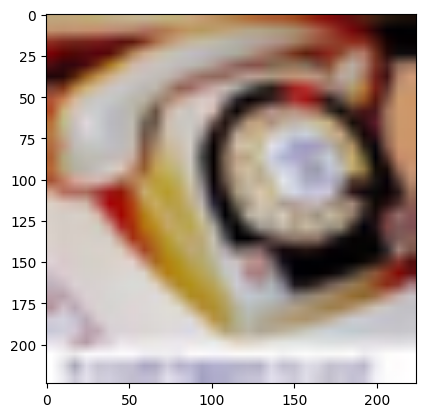

RESULTS WITHOUT FAULT INJECTION
Predicted Label: 89, Class Name: tractor
RESULTS AFTER FAULT INJECTION
Predicted Label: 21, Class Name: chimpanzee


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from pytorchfi.core import fault_injection

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} for computation.")

# Define transformations for the CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of the model
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the dataset
])

# Load CIFAR-100 dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the pretrained ResNet18 model
model = torchvision.models.resnet18(pretrained=True)

# Replace the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 100)  # Adjust for CIFAR-100

model.to(device)
model.eval()  # Set the model to evaluation mode

# Function to convert a normalized tensor to an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Access an image and its label
img, label = dataset[5]  # Get the first sample from the dataset

# Show the image
imshow(img)

# Prepare image for prediction (unsqueeze to add batch dimension)
img = img.unsqueeze(0).to(device)

# Predict the label of the image
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Retrieve the class name for the prediction
class_names = dataset.classes
predicted_class = class_names[predicted.item()]

print("RESULTS WITHOUT FAULT INJECTION")
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

b, k, layer, C, H, W, err_val = [0], [0], [7], [4], [2], [4], [1000000]

inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()

print("RESULTS AFTER FAULT INJECTION")
print(f'Predicted Label: {inj_label}, Class Name: {class_names[inj_label]}')

Using cpu for computation.
Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


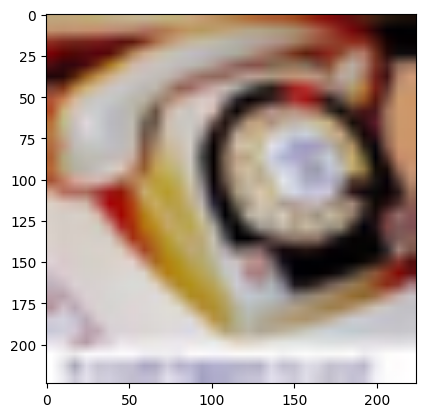

RESULTS WITHOUT FAULT INJECTION
Predicted Label: 89, Class Name: tractor
RESULTS AFTER FAULT INJECTION
Predicted Label: 82, Class Name: sunflower


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from pytorchfi.core import fault_injection

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} for computation.")

# Define transformations for the CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of the model
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the dataset
])

# Load CIFAR-100 dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading VGG16 pretrained model
model = torchvision.models.vgg16(pretrained=True)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 100)

model.to(device)
model.eval()  # Set the model to evaluation mode

# Function to convert a normalized tensor to an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Access an image and its label
img, label = dataset[5]  # Get the first sample from the dataset

# Show the image
imshow(img)

# Prepare image for prediction (unsqueeze to add batch dimension)
img = img.unsqueeze(0).to(device)

# Predict the label of the image
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Retrieve the class name for the prediction
class_names = dataset.classes
predicted_class = class_names[predicted.item()]

print("RESULTS WITHOUT FAULT INJECTION")
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

b, k, layer, C, H, W, err_val = [0], [0], [7], [4], [2], [4], [1000000]

inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()

print("RESULTS AFTER FAULT INJECTION")
print(f'Predicted Label: {inj_label}, Class Name: {class_names[inj_label]}')

Using cpu for computation.
Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


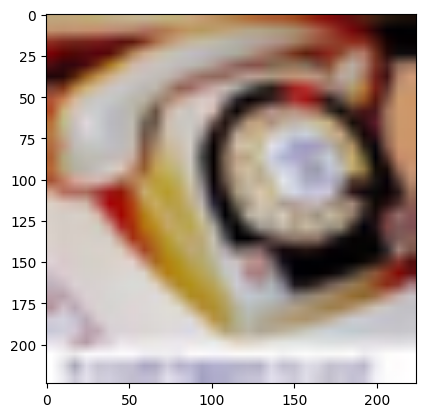

RESULTS WITHOUT FAULT INJECTION
Predicted Label: 56, Class Name: palm_tree
RESULTS AFTER FAULT INJECTION
Predicted Label: 35, Class Name: girl


In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
from pytorchfi.core import fault_injection

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using {device} for computation.")

# Define transformations for the CIFAR-100 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to fit the input size of the model (e.g., ResNet)
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalizes the dataset
])

# Load CIFAR-100 dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = torch.nn.Linear(model.classifier.in_features, 100)

model.to(device)
model.eval()  # Set the model to evaluation mode

# Function to convert a normalized tensor to an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Access an image and its label
img, label = dataset[5]  # Get the first sample from the dataset

# Show the image
imshow(img)

# Prepare image for prediction (unsqueeze to add batch dimension)
img = img.unsqueeze(0).to(device)

# Predict the label of the image
with torch.no_grad():
    outputs = model(img)
    _, predicted = torch.max(outputs, 1)

# Retrieve the class name for the prediction
class_names = dataset.classes
predicted_class = class_names[predicted.item()]

print("RESULTS WITHOUT FAULT INJECTION")
print(f'Predicted Label: {predicted.item()}, Class Name: {predicted_class}')

batch_size = 1
h = 224
w = 224
c = 3

pfi_model = fault_injection(model, 
                            batch_size,
                            input_shape=[c,h,w],
                            layer_types=[torch.nn.Conv2d],
                            use_cuda=False,
                            )

b, k, layer, C, H, W, err_val = [0], [0], [7], [4], [2], [4], [1000000]

inj = pfi_model.declare_neuron_fi(batch=b, layer_num=layer, dim1=C, dim2=H, dim3=W, value=err_val)

inj_output = inj(img)
inj_label = list(torch.argmax(inj_output, dim=1))[0].item()

print("RESULTS AFTER FAULT INJECTION")
print(f'Predicted Label: {inj_label}, Class Name: {class_names[inj_label]}')